# モデルの正確性の計算

同じデータを用いて、特徴量を追加したモデルを作成します

また、モデルの正確性を計算し、混同行列を作成します

## ライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## データの読み込み

‘Bank_data.csv’を読み込みます

In [2]:
raw_data = pd.read_csv('Bank-data.csv')
raw_data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [3]:
# データのコピーを作成します
data = raw_data.copy()
# インデックスの列を削除します
data = data.drop(['Unnamed: 0'], axis = 1)
# mapメソッドを使ってyesとnoを1と0に変換していきます 
data['y'] = data['y'].map({'yes':1, 'no':0})
data

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...
513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [4]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### 従属変数と独立変数の宣言

独立変数として 'duration' を使っていきます

In [5]:
y = data['y']
x1 = data['duration']

### ロジスティック回帰

ロジスティック回帰のモデルを作成します

In [6]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# 結果の表示
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Jan 2024   Pseudo R-squ.:                  0.2121
Time:                        15:27:58   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

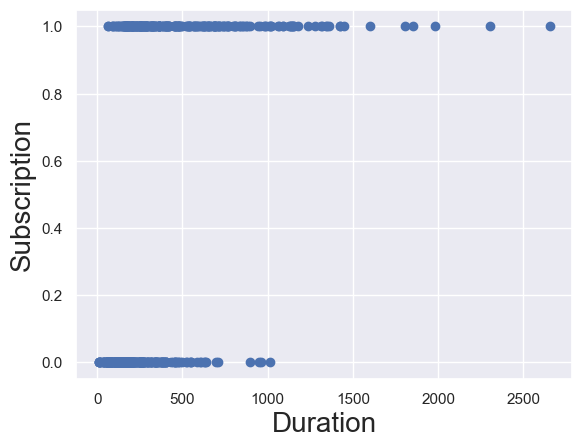

In [7]:
# x1とyの散布図の作成
plt.scatter(x1,y,color = 'C0')
# 軸に名前を付ける
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

## モデルの拡張

‘interest_rate’, ‘march’, ‘credit’ , ‘previous’を追加したモデルを作成していきます

In [12]:
y2 = data['y']
x2 = data['previous']

In [13]:
x = sm.add_constant(x2)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# 結果の表示
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.637404
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Jan 2024   Pseudo R-squ.:                 0.08042
Time:                        15:34:50   Log-Likelihood:                -330.18
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 2.976e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2401      0.095     -2.534      0.011      -0.426      -0.054
previous       2.5427      0.439      5.798      0.000       1.683       3.402
==============================================================================
"""

0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
513    0.0
514    1.0
515    0.0
516    1.0
517    0.0
Name: previous, Length: 518, dtype: float64


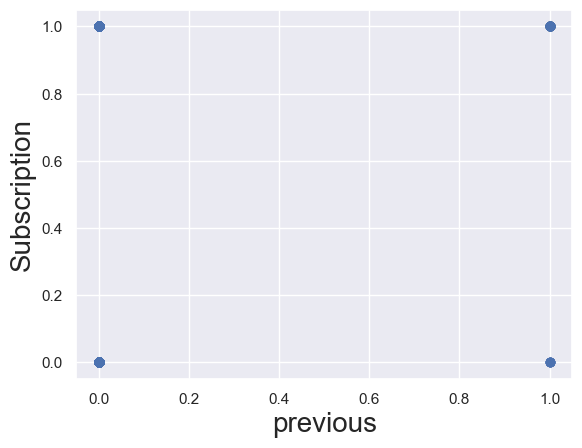

In [20]:
# x1とyの散布図の作成
print(x2)
plt.scatter(x2,y2,color = 'C0')
# 軸に名前を付ける
plt.xlabel('previous', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [15]:
y3 = data['y']
x3 = data['credit']

In [16]:
x = sm.add_constant(x3)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# 結果の表示
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.676022
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Jan 2024   Pseudo R-squ.:                 0.02471
Time:                        15:35:53   Log-Likelihood:                -350.18
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 2.531e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0640      0.089     -0.715      0.474      -0.239       0.111
credit         2.8972      1.033      2.805      0.005       0.873       4.922
==============================================================================
"""

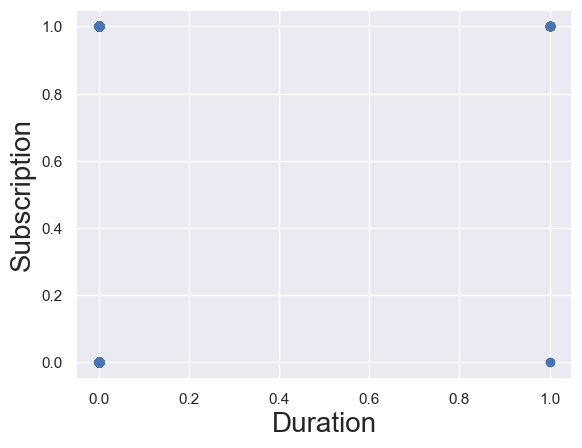

In [17]:
# x1とyの散布図の作成
plt.scatter(x3,y3,color = 'C0')
# 軸に名前を付ける
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [21]:
y4 = data['y']
x4 = data['march']

In [22]:
x = sm.add_constant(x4)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# 結果の表示
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.676121
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Jan 2024   Pseudo R-squ.:                 0.02456
Time:                        15:42:28   Log-Likelihood:                -350.23
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 2.670e-05
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2220      0.103      2.150      0.032       0.020       0.424
march         -0.8506      0.206     -4.121      0.000      -1.255      -0.446
==============================================================================
"""

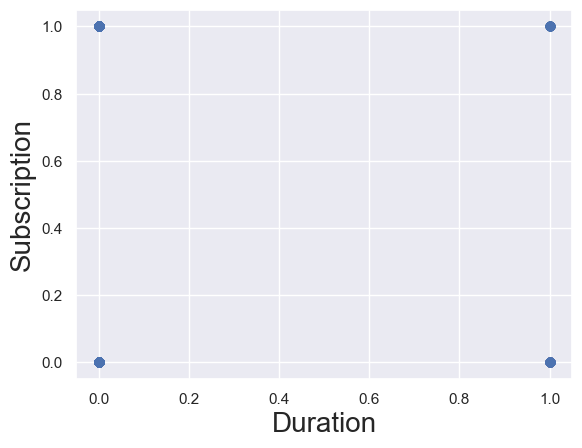

In [23]:
# x1とyの散布図の作成
plt.scatter(x4,y4,color = 'C0')
# 軸に名前を付ける
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

In [24]:
y5 = data['y']
x5 = data['interest_rate']

In [25]:
x = sm.add_constant(x5)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# 結果の表示
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.568641
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 26 Jan 2024   Pseudo R-squ.:                  0.1796
Time:                        15:43:31   Log-Likelihood:                -294.56
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 6.822e-30
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6146      0.181      8.896      0.000       1.259       1.970
interest_rate    -0.5734      0.054    -10.531      0.000      -0.680      -0.467
=================================================================================
"""

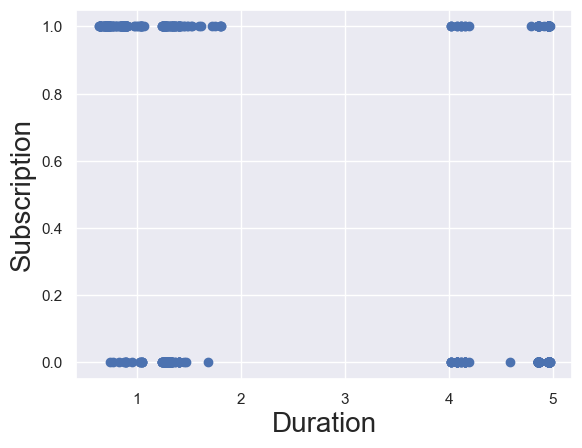

In [26]:
# x1とyの散布図の作成
plt.scatter(x5,y5,color = 'C0')
# 軸に名前を付ける
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

### 独立変数の宣言

In [27]:
# durationのオッズは、まとめ表の対数オッズの指数となります
np.exp(0.0051)

1.005113027136717

In [29]:
# 追加する列のリストを作成します 
estimators=['interest_rate','march','credit','previous','duration']

X1 = data[estimators]
y = data['y']

In [30]:
X = sm.add_constant(X1)
reg_logit = sm.Logit(y,X)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Method:           MLE       
Dependent Variable: y                Pseudo R-squared: 0.514     
Date:               2024-01-26 15:46 AIC:              360.7836  
No. Observations:   518              BIC:              386.2834  
Df Model:           5                Log-Likelihood:   -174.39   
Df Residuals:       512              LL-Null:          -359.05   
Converged:          1.0000           LLR p-value:      1.2114e-77
No. Iterations:     7.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.0211   0.3113 -0.0677 0.9460 -0.6313  0.5891
interest_rate     -0.8001   0.0895 -8.9434 0.0000 -0.9755 -0.6248
march             -1.8322   0.3297 -5.5563 0.0000 -2.4785 -1.1859
credit             2.3585   1.0875  2.1688 0.0301  0.2271  4.4900
previous           1.5363   0.5010  3.0666 0.0022  0.5544  2.5182
duration           0.0070   0.0007  9.3810 0.0000  0.0055  0.0084
=================================================================

"""

### 混同行列

混同行列を作成して正確性を求めます

In [34]:
def confusion_matrix(data,actual_values,model):
        
        #ロジットモデルを使った値の予測
        #pred_values = model.predict(data)
        pred_values = model.predict(data)
        # 階級の規定
        #bins=np.array([0,0.5,1])
        bins=np.array([0,0.5,1])
        # ヒストグラムを作成し、値が0と0.5の間の場合は0に、
        # 0.5と1の間の場合は1にします
        cm = np.histogram2d(actual_values, pred_values, bins)[0]
        # 正確性の計算
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # 混同行列と正確性
        return cm, accuracy

In [35]:
confusion_matrix(X,y,results_logit)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)